https://colab.research.google.com/drive/1GzhwRA9ejEj0duZEWdTUO5BEtJHTP8Il

In [0]:
!wget https://www.dropbox.com/s/0pigmmmynbf9xwq/dataset1.zip

--2019-10-01 03:54:08--  https://www.dropbox.com/s/0pigmmmynbf9xwq/dataset1.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/0pigmmmynbf9xwq/dataset1.zip [following]
--2019-10-01 03:54:09--  https://www.dropbox.com/s/raw/0pigmmmynbf9xwq/dataset1.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc964d32650875c4f8940a56ad8a.dl.dropboxusercontent.com/cd/0/inline/AplvfbprAQNyQ43baz0pdVUzhaDwndoLy0x2UUi-lxBafDxmXWZeN9H-ruLy2eMQHNd1U4M9UKqoHQ8ShYjIupif2PnZNIYZpB5BKymXNlK1uw/file# [following]
--2019-10-01 03:54:09--  https://uc964d32650875c4f8940a56ad8a.dl.dropboxusercontent.com/cd/0/inline/AplvfbprAQNyQ43baz0pdVUzhaDwndoLy0x2UUi-lxBafDxmXWZeN9H-ruLy2eMQHNd1U4M9UKqoHQ8ShYjIupif2PnZNIYZpB5BKymXNlK1uw/file
Resolving uc964d

In [0]:
!unzip dataset1.zip

In [0]:
dir_data = "/content/dataset1"
dir_seg = dir_data + "/annotations_prepped_train/"
dir_img = dir_data + "/images_prepped_train/"

In [0]:
import glob, os
all_img_paths = glob.glob(os.path.join(dir_img, '*.png'))
all_img_paths[:5]

['/content/dataset1/images_prepped_train/0016E5_07920.png',
 '/content/dataset1/images_prepped_train/0001TP_008460.png',
 '/content/dataset1/images_prepped_train/0016E5_05040.png',
 '/content/dataset1/images_prepped_train/0001TP_007170.png',
 '/content/dataset1/images_prepped_train/0001TP_006960.png']

In [0]:
import glob, os
all_mask_paths = glob.glob(os.path.join(dir_seg, '*.png'))
all_mask_paths[:5]

['/content/dataset1/annotations_prepped_train/0016E5_07920.png',
 '/content/dataset1/annotations_prepped_train/0001TP_008460.png',
 '/content/dataset1/annotations_prepped_train/0016E5_05040.png',
 '/content/dataset1/annotations_prepped_train/0001TP_007170.png',
 '/content/dataset1/annotations_prepped_train/0001TP_006960.png']

In [0]:
all_img_paths[0].split('/')[4]

'0016E5_07920.png'

In [0]:
x = []
y = []
count = 0

In [0]:
import cv2
from scipy import ndimage
for i in range(len(all_img_paths)):
  img = cv2.imread(all_img_paths[i])
  img = cv2.resize(img,(224,224))
  mask_path = dir_seg+all_img_paths[i].split('/')[4]
  img_mask = cv2.imread(mask_path)
  img_mask = cv2.resize(img_mask,(224,224))
  x.append(img)
  y.append(img_mask)
  if(i%100==0):
    print(i)

0
100
200
300


In [0]:
import numpy as np
np.array(y).shape

(367, 224, 224, 3)

In [0]:
np.array(x).shape

(367, 224, 224, 3)

In [0]:
x = np.array(x)
y = np.array(y)

In [0]:
y2 = np.where(y==8,1,0)
y2.shape

(367, 224, 224, 3)

In [0]:
y.shape

(367, 224, 224, 3)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


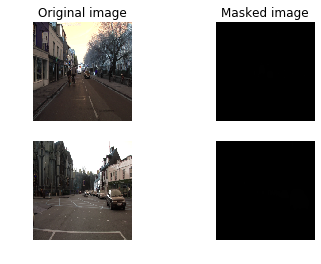

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(221)
plt.imshow(x[0])
plt.axis('off')
plt.title('Original image')
plt.grid('off')
plt.subplot(222)
plt.imshow(y2[0])
plt.axis('off')
plt.title('Masked image')
plt.grid('off')
plt.subplot(223)
plt.imshow(x[2])
plt.axis('off')
plt.grid('off')
plt.subplot(224)
plt.imshow(y2[2])
plt.axis('off')
plt.grid('off')
plt.show()

(array([6.777e+03, 3.000e+01, 6.030e+03, 0.000e+00, 5.760e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

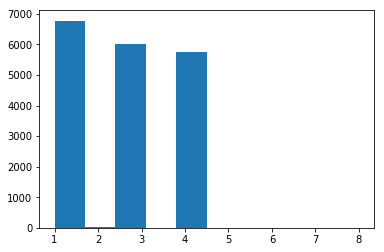

In [0]:
plt.hist(y[0,100:,:50].flatten())

In [0]:
x = np.array(x)
y2 = np.array(y2)[:,:,:,0]
y2 = y2.reshape(y2.shape[0],y2.shape[1],y2.shape[2],1)
print(x.shape, y2.shape)

(367, 224, 224, 3) (367, 224, 224, 1)


In [0]:
x = x/255
print(np.max(x))

1.0


In [0]:
from keras.applications.vgg16 import VGG16 as PTModel
base_pretrained_model = PTModel(input_shape =  (224,224,3), include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False
base_pretrained_model.summary()

Using TensorFlow backend.






58892288/58889256 [==============================] - 2s 0us/step


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
________________________________________________________

In [0]:
from keras.layers import Input, Conv2D, concatenate, UpSampling2D, BatchNormalization, Activation, Cropping2D, ZeroPadding2D

In [0]:
from keras.layers import Input, merge, Conv2D, MaxPooling2D,UpSampling2D, Dropout, Cropping2D, merge, concatenate
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.models import Model

In [0]:
conv1 = Model(inputs=base_pretrained_model.input,outputs=base_pretrained_model.get_layer('block1_conv2').output).output
conv2 = Model(inputs=base_pretrained_model.input,outputs=base_pretrained_model.get_layer('block2_conv2').output).output
conv3 = Model(inputs=base_pretrained_model.input,outputs=base_pretrained_model.get_layer('block3_conv3').output).output
conv4 = Model(inputs=base_pretrained_model.input,outputs=base_pretrained_model.get_layer('block4_conv3').output).output
drop4 = Dropout(0.5)(conv4)
conv5 = Model(inputs=base_pretrained_model.input,outputs=base_pretrained_model.get_layer('block5_conv3').output).output
drop5 = Dropout(0.5)(conv5)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
up6 = Conv2D(512, 2, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(UpSampling2D(size =(2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)

conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(conv6)
conv6 = BatchNormalization()(conv6)
up7 = Conv2D(256, 2, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(UpSampling2D(size =(2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(conv7)
conv7 = BatchNormalization()(conv7)
up8 = Conv2D(128, 2, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(UpSampling2D(size =(2,2))(conv7))
merge8 = concatenate([conv2,up8],axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(conv8)
conv8 = BatchNormalization()(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(UpSampling2D(size =(2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same',kernel_initializer = 'he_normal')(conv9)
conv9 = BatchNormalization()(conv9)

conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)	

In [0]:
model = Model(input = base_pretrained_model.input, output = conv10)
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
____________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.


In [0]:
for layer in model.layers[:18]:
  layer.trainable = False

In [0]:
model.compile(optimizer=Adam(1e-3, decay = 1e-6), 
                   loss='binary_crossentropy', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
np.max(x)

1.0

In [0]:
np.sum(y2)

1083066

In [0]:
history = model.fit(x,y2,epochs=15,batch_size=1,validation_split=0.1)

Train on 330 samples, validate on 37 samples
Epoch 1/15
330/330 [==============================] - 69s 209ms/step - loss: 0.2693 - acc: 0.9265 - val_loss: 0.2891 - val_acc: 0.8975
Epoch 2/15
330/330 [==============================] - 62s 186ms/step - loss: 0.1118 - acc: 0.9590 - val_loss: 0.0767 - val_acc: 0.9747
Epoch 3/15
330/330 [==============================] - 62s 187ms/step - loss: 0.0946 - acc: 0.9674 - val_loss: 0.1057 - val_acc: 0.9615
Epoch 4/15
330/330 [==============================] - 62s 187ms/step - loss: 0.0800 - acc: 0.9741 - val_loss: 0.0714 - val_acc: 0.9779
Epoch 5/15
330/330 [==============================] - 62s 187ms/step - loss: 0.0620 - acc: 0.9807 - val_loss: 0.0635 - val_acc: 0.9788
Epoch 6/15
330/330 [==============================] - 61s 186ms/step - loss: 0.0530 - acc: 0.9835 - val_loss: 0.0666 - val_acc: 0.9817
Epoch 7/15
330/330 [==============================] - 62s 188ms/step - loss: 0.0472 - acc: 0.9853 - val_loss: 0.0610 - val_acc: 0.9795
Epoch 8/15

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


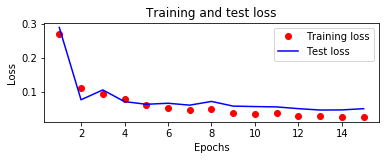

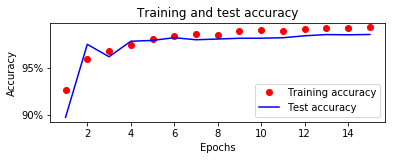

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(val_loss_values) + 1)
plt.subplot(211)
plt.plot(epochs, history.history['loss'], 'ro', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, history.history['acc'], 'ro', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()

In [0]:
y_pred = model.predict(x[-2:].reshape(2,224,224,3))
y_predi = np.argmax(y_pred, axis=3)
y_testi = np.argmax(y2[-2:].reshape(2,224,224,1), axis=3)
#np.mean(y_predi == y_testi)

In [0]:
y_pred.shape

(2, 224, 224, 1)

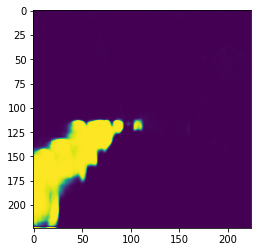

In [0]:
plt.imshow(y_pred[-1,:,:,0])

In [0]:
np.sum(y_testi)

0

In [0]:
np.mean(y_predi == y_testi)

1.0

In [0]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
import keras, sys, time, warnings
from keras.models import *
from keras.layers import *
import pandas as pd 

In [0]:
y2.shape

(367, 224, 224, 1)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


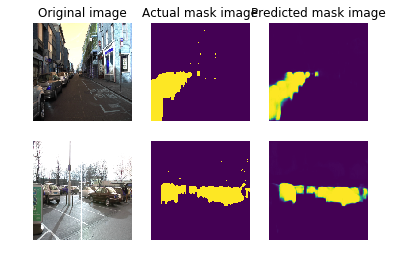

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplot(231)
plt.imshow(x[-1])
plt.axis('off')
plt.title('Original image')
plt.grid('off')
plt.subplot(232)
plt.imshow(y2[-1,:,:,0])
plt.axis('off')
plt.title('Actual mask image')
plt.grid('off')
plt.subplot(233)
plt.imshow(y_pred[-1,:,:,0])
plt.axis('off')
plt.title('Predicted mask image')
plt.grid('off')
plt.subplot(234)
plt.imshow(x[-2])
plt.axis('off')
plt.grid('off')
plt.subplot(235)
plt.imshow(y2[-2,:,:,0])
plt.axis('off')
plt.grid('off')
plt.subplot(236)
plt.imshow(y_pred[-2,:,:,0])
plt.axis('off')
plt.grid('off')
plt.show()

In [0]:
from keras.utils import plot_model

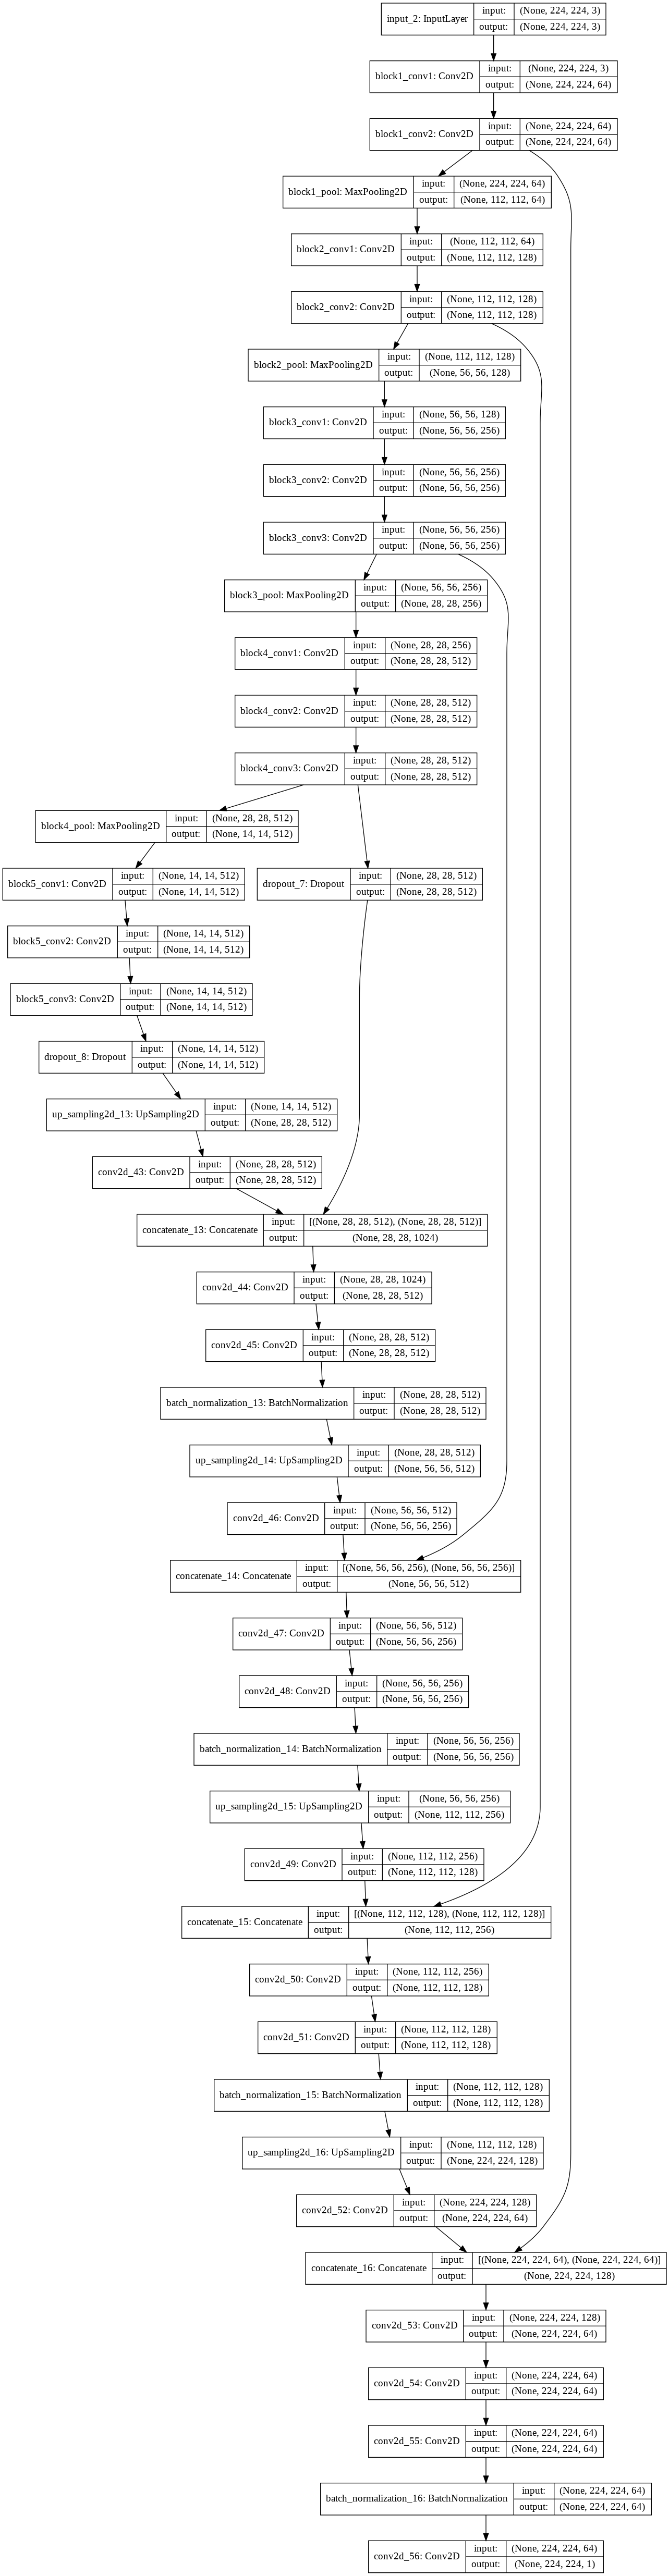

In [0]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')